In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

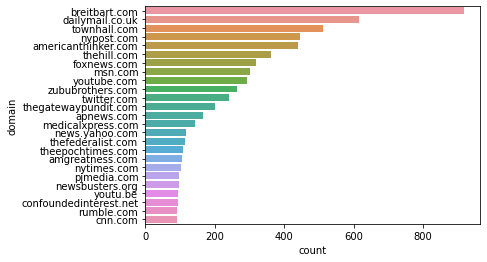

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

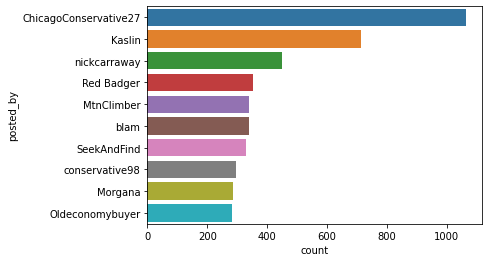

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  Kaslin                   193      1   
                     MtnClimber               157      1   
                     SeekAndFind               58      1   
                     blam                       1      1   
                     conservative98             1      1   
amgreatness.com      MtnClimber                81      1   
                     Red Badger                 6      1   
apnews.com           SeekAndFind                1      1   
                     conservative98             2      1   
                     ChicagoConservative27      1      1   
                     Morgana                    1      1   
                     Oldeconomybuyer          104      1   
                     nickcarraway               3      1   
breitbart.com        SeekAndFind                3      1   
                     blam                      28      1   
                     conservative98            47      1   
                     Red Badger                 6      1   
                     ChicagoConservative27    538      1   
                     Morgana                   42      1   
cnn.com              conservative98             6      1   
                     ChicagoConservative27     13      1   
                     Morgana                    7      1   
                     Oldeconomybuyer            3      1   
dailymail.co.uk      SeekAndFind                2      1   
                     conservative98            10      1   
                     Red Badger                 3      1   
                     ChicagoConservative27      1      1   
                     Morgana                  156      1   
                     nickcarraway               3      1   
foxnews.com          Kaslin                    23      1   
                     conservative98            54      1   
                     Red Badger                 5      1   
                     ChicagoConservative27     40      1   
                     Morgana                    9      1   
                     Oldeconomybuyer            5      1   
                     nickcarraway               5      1   
msn.com              SeekAndFind                2      1   
                     Red Badger                 4      1   
                     Oldeconomybuyer           26      1   
                     nickcarraway               8      1   
news.yahoo.com       SeekAndFind                4      1   
                     conservative98             5      1   
                     Red Badger                 1      1   
                     ChicagoConservative27      2      1   
                     Morgana                    3      1   
                     Oldeconomybuyer           22      1   
                     nickcarraway              11      1   
newsbusters.org      Red Badger                 1      1   
                     Morgana                    2      1   
nypost.com           MtnClimber                 1      1   
                     SeekAndFind                3      1   
                     conservative98            37      1   
                     Red Badger                 4      1   
                     ChicagoConservative27     93      1   
                     Oldeconomybuyer            7      1   
                     nickcarraway              86      1   
nytimes.com          SeekAndFind                1      1   
                     conservative98             1      1   
                     Morgana                    2      1   
pjmedia.com          MtnClimber                 1      1   
                     SeekAndFind               31      1   
                     conservative98             1      1   
rumble.com           conservative98             9      1   
                     Red Badger                 1      1   
theepochtimes.com    Se

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"Elementary School Shooting in Uvalde, Texas - LIVE BREAKING NEWS COVERAGE",2022-05-24 22:21:41,279.0
"JUST IN - U.S. Supreme Court has voted to strike down Roe vs. Wade, an initial draft majority opinion by Justice Alito shows.",2022-05-03 02:30:14,272.0
What is your favorite song that actually tells a story?,2022-04-23 00:13:04,270.0
Mark Levin says conservatives who oppose intervention in Ukraine actually “hate America”,2022-04-25 03:24:59,241.0
What is the worst movie you have ever seen?Please post clip and/or imdb listing,2022-04-21 17:19:36,178.0
Russia orders Ukrainian forces in Mariupol to surrender by Sunday morning,2022-04-17 04:54:54,155.0
Breaking: Mass Shooting - Buffalo NY,2022-05-14 21:06:23,154.0
"China Preparing for “D-Day” INVASION of the Continental United States, With Forces to Land on the Beaches of California, as Biden and Newsom Serve as China’s Accomplices: Sources",2022-05-21 01:55:41,152.0
